## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot


We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [3]:
#answer below:
lager = lager.drop(columns=['beer'])
lager.head()

,tpc,ma,dsa,asa,orac,rp,mca
0,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,146.03,11.72,0.64,0.90,3.18,0.47,9.39


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [10]:
X = lager.drop(columns=['tpc'])
y = lager['tpc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


Next, we'll generate a linear model and plot the residual vs. fit plot.

What are the coefficients, and what are their significance?

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
display(
    X.columns,
    model.coef_,
    model.intercept_
)

Index(['ma', 'dsa', 'asa', 'orac', 'rp', 'mca'], dtype='object')

array([  1.27914897, 110.83201716,   4.14589374,  -1.61969433,
        57.55850751,   0.47404448])

34.5840829822358

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


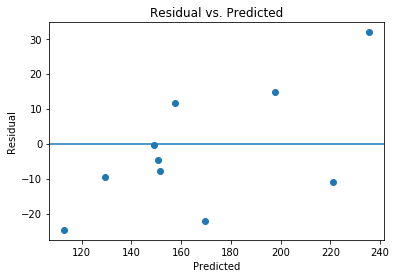

In [21]:
predictions = model.predict(X_test)
errors = y_test - predictions

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
lm_results = sm.OLS(y_train, X_train_const).fit()

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Coefficient significance:

<span style="color:blue">From the coefficients we can tell that DSA (DPPH radical scavenging activity) and RP (Reducing Power) have the most significance in regards to the affect on TPC (Total phenolic content)</span>

***

Compute the VIF for all features in the model

In [18]:
X = sm.add_constant(X)

vifs = []
for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    vifs.append(vif)

pd.Series(vifs, index=X.columns)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

Plot the qq-plot for our errors (make sure to standardize the errors to compare to the standard normal distribtion):

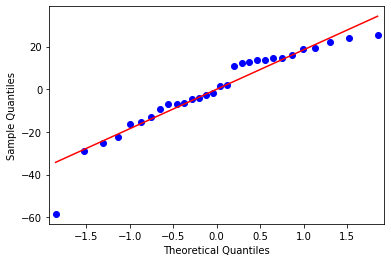

In [22]:
qqplot(lm_results.resid, line="s")
plt.show()